In [46]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def read_last_run_power_data(filepath: str):
    """
    Reads the power log file and returns the data after the last header.

    Args:
        filepath (str): Path to the log file.

    Returns:
        List[List[float]]: Data rows after the last header.
    """
    data = []
    with open(filepath, "r", encoding="utf-8") as f:
        lines = f.readlines()

    # Find the last header line
    last_header_idx = -1
    for idx, line in enumerate(lines):
        if line.startswith("#"):
            last_header_idx = idx

    # Read the last header line
    header = lines[last_header_idx]
    # Remove the leading '#' and strip whitespace
    header = header.lstrip("#").strip()
    # Match 'time (s)', 'cpu 0 (W)', etc.
    labels = re.findall(r'\w+(?: \d+)? \(.\)', header)

    # Read data after the last header
    for line in lines[last_header_idx + 1:]:
        if line.strip() and not line.startswith("#"):
            row = [float(x) for x in line.strip().split()[1:]] # Skip the first column (timestamp)
            data.append(row)
    return labels, data

In [48]:
labels, data = read_last_run_power_data("wattameter_x3108c0s17b0n0.log")
print("Labels:", labels)

data = np.array(data)
time_series = data[:, 0]
power_series = {}
for i in range(1, data.shape[1]):
    power_series[labels[i]] = data[:, i]

Labels: ['time (s)', 'cpu 0 (W)', 'cpu 1 (W)', 'gpu 0 (W)', 'ram 0 (W)']


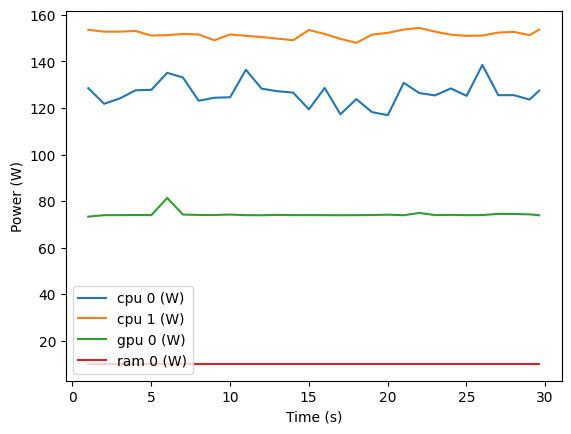

In [49]:
for key in power_series.keys():
    plt.plot(time_series, power_series[key], label=key)
    
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.legend()
plt.show()